# Normal Distribution

# 1. 前言

在概率论和统计的世界里，正态分布（Normal Distribution）,通常也称为高斯分布(Gaussian Distribution), 是最重要的连续概率分布. 有时候也称为钟形分布，因为它的概率密度函数(pdf)曲线呈钟形曲线(bell curve)的形状。由于大数定律的作用，高斯分布在现实世界中处处可见。进一步，它也可以用于对于其它概率分布的近似表示。所以高斯分布是最常用、最基本、最重要的概率分布（可能不需要之一）。
遵循正态分布的一维随机变量记为：
$$X \sim Normal(\mu, \sigma^2)$$
或者 
$$X \sim N(\mu, \sigma^2)$$

其中通常$\mu$表示均值(mean)，$\sigma^2$表示方差(variance)，$\sigma$则称为标准偏差(standard deviation).


In [1]:
import random
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt


# 2. 概率密度函数(PDF: Probability Density Function)

与离散随机变量用概率质量函数(PMF)或分布律来表示不同，连续随机变量的概率分布特性用概率密度函数(PDF: Probability Density Function)来刻画。
一维高斯分布的概率密度函数(PMF中通常用大写字母P，而概率密度函数则通常用小写的p或f)如下式所示：

正态分布的概率密度函数为$$f(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{(x-\mu)^2}{2\sigma^2})$$

其中通常$\mu$表示均值(mean)， $\sigma^2$ 表示方差(variance)， $\sigma$ 则称为标准偏差(standard deviation).

其中均值为0方差为1的正态分布称为标准正态分布。

正态分布的概率密度函数如下图所示，用scikitlearn.stats中norm类的pdf(x, loc=0, scale=1)函数生成。
缺省参数条件下，norm.pdf()生成标准正态分布的概率密度函数。loc参数用于指定$\mu$, scale参数用于指定$\sigma$。

scikit-learn还提供了logpdf()用于绘制对数概率密度函数，其调用方法与pdf()相同。

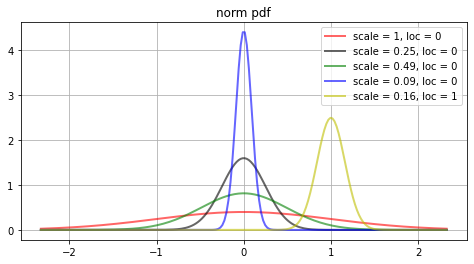

In [2]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 200)
ax.plot(x, norm.pdf(x),'r-', lw=2, alpha=0.6, label='scale = 1, loc = 0')
ax.plot(x, norm.pdf(x,scale=0.25),'k-', lw=2, alpha=0.6, label='scale = 0.25, loc = 0')
ax.plot(x, norm.pdf(x,scale=0.49),'g-', lw=2, alpha=0.6, label='scale = 0.49, loc = 0')
ax.plot(x, norm.pdf(x,scale=0.09),'b-', lw=2, alpha=0.6, label='scale = 0.09, loc = 0')
ax.plot(x, norm.pdf(x,loc = 1, scale=0.16),'y-', lw=2, alpha=0.6, label='scale = 0.16, loc = 1')
ax.set_title('norm pdf')
ax.grid()
ax.legend()

In [1]:
# DIY implementation of normal distribution pdf function
def norm_pdf(x, n):
    u = x.mean()
    s = x.std()

    # divide [x.min(), x.max()] by n
    x = np.linspace(x.min(), x.max(), n)

    a = ((x - u) ** 2) / (2 * (s ** 2))
    y = 1 / (s * np.sqrt(2 * np.pi)) * np.exp(-a)

    return x, y, x.mean(), x.std()

# 3. 累积分布函数(CDF: Cumulative Distribution Function)

标准正态分布的累积分布函数如下所示：
$$F(x;\mu,\sigma) = \int_{-\infty}^x\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{(x-\mu)^2}{2\sigma^2})dx$$

但是这个积分没有简单的闭式解(closed formula)，需要以数值计算的方式进行求解。

正态分布的概率密度函数如下图所示，用scikitlearn中norm类的pdf(x, loc=0, scale=1)函数生成。
缺省参数条件下，norm.pdf()生成标准正态分布的概率密度函数。loc参数用于指定$\mu$, scale参数用于指定$\sigma$。

scikit-learn提供了cdf()用于绘制累积分布函数，其调用参数与pdf()相同。
如下为正态分布的累积分布函数曲线示意图。注意，正态分布的累积分布函数有两个特征：

(1) 在均值点处到达0.5. 这是因为正态分布是以均值点处左右对称的

(2) 方差越小，意味着在均值点左右的斜率越大

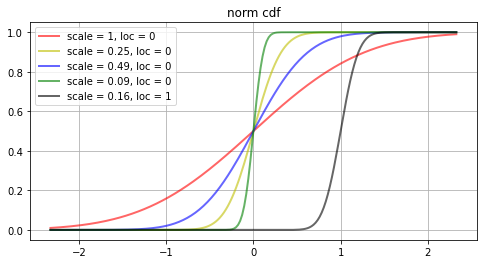

In [3]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 200)
ax.plot(x, norm.cdf(x),'r-', lw=2, alpha=0.6, label='scale = 1, loc = 0')
ax.plot(x, norm.cdf(x,scale=0.25),'y-', lw=2, alpha=0.6, label='scale = 0.25, loc = 0')
ax.plot(x, norm.cdf(x,scale=0.49),'b-', lw=2, alpha=0.6, label='scale = 0.49, loc = 0')
ax.plot(x, norm.cdf(x,scale=0.09),'g-', lw=2, alpha=0.6, label='scale = 0.09, loc = 0')
ax.plot(x, norm.cdf(x,loc = 1, scale=0.16),'k-', lw=2, alpha=0.6, label='scale = 0.16, loc = 1')
ax.set_title('norm cdf')
ax.grid()
ax.legend()

# 4. 百分点函数(PPF: Percent Point Function)


百分点函数PPF是CDF的反函数，$$PPF(u)=F^{-1}(u)$$它回答了“为了得到一定的累积分布概率，CDF相应的输入值是什么”的问题。

与累积分布函数相同的是，正态分布的百分点函数同样没有闭式表达形式，只能通过数值方式求解。

scikit-learn提供了ppf(q, loc=0, scale=1)用于求解百分点值。参数loc和scale含义同上，参数q在这里指定所希望得到的累积概率。

事实上在上面的示例中，我们已经用到了ppf函数，通过以下语句将横坐标(x)取值范围限制到累积分布概率为0.01到0.99之间。

x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 200)

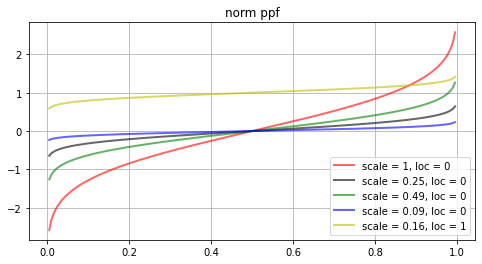

In [4]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
q = np.linspace(0,1, 200)
ax.plot(q, norm.ppf(q),'r-', lw=2, alpha=0.6, label='scale = 1, loc = 0')
ax.plot(q, norm.ppf(q,scale=0.25),'k-', lw=2, alpha=0.6, label='scale = 0.25, loc = 0')
ax.plot(q, norm.ppf(q,scale=0.49),'g-', lw=2, alpha=0.6, label='scale = 0.49, loc = 0')
ax.plot(q, norm.ppf(q,scale=0.09),'b-', lw=2, alpha=0.6, label='scale = 0.09, loc = 0')
ax.plot(q, norm.ppf(q,loc = 1, scale=0.16),'y-', lw=2, alpha=0.6, label='scale = 0.16, loc = 1')
ax.set_title('norm ppf')
ax.grid()
ax.legend()

# 5. 生成函数和风险函数


生存函数(Survial Function)定义为$$S(x) = Pr[X > x] = 1 - F(x)$$
S(x)通常用于可靠性分析及其相关领域。

风险函数为概率密度函数与生存函数之比$$H(x)=\frac{f(x)}{S(x)}=\frac{f(x)}{1-F(x)}$$
由于它们都是基于累积分布函数定义的，自然都没有闭式表达形式，只能通过数值方式求解。

scikit-learn提供了sf(q, loc=0, scale=1)用于求解生存函数(why is it necessary?)。参数loc和scale含义同上。
风险函数则可以基于以上定义计算而得。

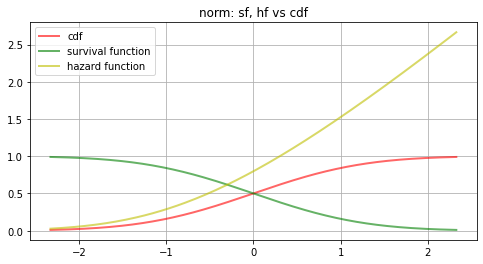

In [5]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 200)
ax.plot(x, norm.cdf(x),'r-', lw=2, alpha=0.6, label='cdf')
ax.plot(x, norm.sf(x),'g-', lw=2, alpha=0.6, label='survival function')
ax.plot(x, norm.pdf(x)/norm.sf(x),'y-', lw=2, alpha=0.6, label='hazard function')
#ax.plot(x, norm.cdf(x,scale=0.25),'y-', lw=2, alpha=0.6, label='scale = 0.25, loc = 0')
#ax.plot(x, norm.cdf(x,scale=0.49),'b-', lw=2, alpha=0.6, label='scale = 0.49, loc = 0')
#ax.plot(x, norm.cdf(x,scale=0.09),'g-', lw=2, alpha=0.6, label='scale = 0.09, loc = 0')
#ax.plot(x, norm.cdf(x,loc = 1, scale=0.16),'k-', lw=2, alpha=0.6, label='scale = 0.16, loc = 1')
ax.set_title('norm: sf, hf vs cdf')
ax.grid()
ax.legend()

其它相关联的还有累积风险函数(cumulative hazard function)，逆生存函数(inverse survival function), 这里就不一一说明了。

# 6. 常用统计特征


正态分布由于是基于它的均值和方差进行定义的，所以它的常用统计特征非常简单明了，对于$X \sim N(\mu, \sigma^2)$：

$$E[X] = \mu$$
$$Var[X] = \sigma^2$$

此外，正态分布的中位数(median)和众数(mode)都等于$\mu$. 正态分布的取值范围为$(-\infty, \infty)$

$$Skew(X) = E[(\frac{x-E(X)}{\sigma})^3] = 0$$

$$Kurtosis(X) = E[{(\frac{x-E(X)}{\sigma})^4}]-3 = 0$$

正态分布由于是对称的，所以它的Skew为0是，因为Skew就是用于评估偏度的。

正态分布的峰度(Kurtosis)为0，事实上，这个是一个定义的问题。以上是scikit-learn中计算峰度的公式(也有不减3的)，之所以减3就是将正态分布当作一个基准，-3是要使得正态分布的峰度为0.

用scikit-learn提供的函数计算正态分布的以上几个统计特征的示例如下：


In [9]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
print('Normal Distribution: \nmean = {0}\nvar = {1}\nskew = {2}\nkurt = {3}\n'.format(mean, var, skew, kurt))

Normal Distribution: 
mean = 0.0
var = 1.0
skew = 0.0
kurt = 0.0



# 7. 应用示例

## 7.1 从正态分布中采样

sample means of r = -0.0016793343198281577
sample variance of r = 1.0021068160880653


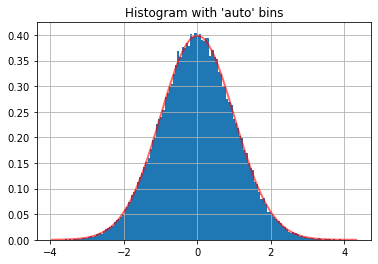

In [16]:
r = norm.rvs(0, size=100000)
fig,ax=plt.subplots(1,1)
ax.hist(r, bins='auto', density=True)  # arguments are passed to np.histogram
x = np.linspace(np.min(r),np.max(r),100)
ax.plot(x, norm.pdf(x),'r-', lw=2, alpha=0.6, label='scale = 1, loc = 0')

ax.set_title("Histogram with 'auto' bins")
ax.grid()

print('sample means of r = {0}'.format(np.mean(r)))
print('sample variance of r = {0}'.format(np.var(r)))

以上示例是从标准正态分布中采样10000个样点。从直方图可以看出基本上符合钟形曲线的特征(其轮廓也与pdf理论曲线非常吻合)，样本均值和样本方差也基本上符合预期。

## 7.2 The 68-95-99.7 Rule

对于正态分布，以均值点为中心的[-\sigma, \sigma]区间的面积大概为68%，这意味着在正态分布总体中68%的样本落在均值加减1个标准偏差范围内。同理，正态分布总体中95%的样本落在均值加减2个标准偏差范围内，正态分布总体中99.7%的样本落在均值加减3个标准偏差范围内。如下图所示：

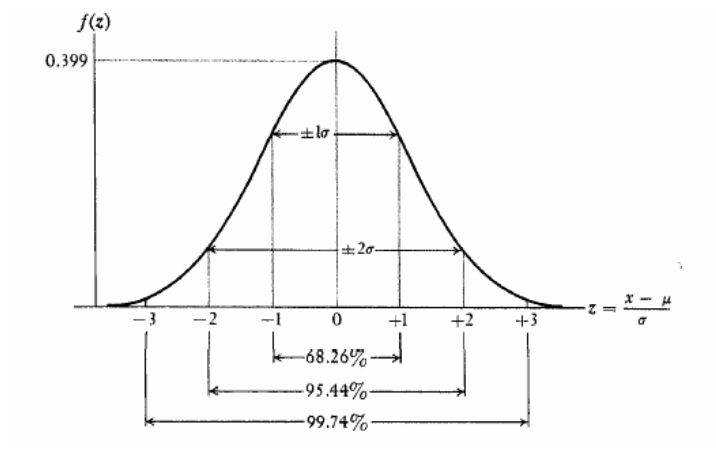

也可以利用以下代码计算出任意范围内的总概率。

In [21]:
for k in range(1,6):
    print('prob with [-{0}*sigma, {1}*sigma] = {2}'.format(k,k,norm.cdf(k) - norm.cdf(-k)))


prob with [-1*sigma, 1*sigma] = 0.6826894921370859
prob with [-2*sigma, 2*sigma] = 0.9544997361036416
prob with [-3*sigma, 3*sigma] = 0.9973002039367398
prob with [-4*sigma, 4*sigma] = 0.9999366575163338
prob with [-5*sigma, 5*sigma] = 0.9999994266968562


# 8. Why is the normal distribution useful and important?


不管是从理论的角度还是从使用的角度来说，正态分布都可以说是概率统计中最重要的分布。

(1) 许多经典的统计测试都是基于正态分布假设。在对数据进行这些统计测试时，需要首先确认数据是否符合正态分布。

(2) 在建模应用中，比如说线性或非线性回归，误差项通常都被假定遵循正态分布。

(3) 正态分布也被用于在需要假设检验以及置信区间检验中确定显著性水平。

(4)	现实世界中许许多多的事物或现象都是呈正态分布或者近似于正态分布的。比如说，正常人的身高的分布，智商的分布都是近似于正态分布的。测量误差也通常是呈正态分布。

(5)	正态分布非常方便于数学处理。在许多实际应用中，基于正态分布理论所开发的应用方法都工作得非常好，即便在处理对象并不是正态分布时。

(6)	大数定律和中心极限定理从理论上证明了为什么正态分布为什么如此常见以及为什么如此有用。根据中心极限定理，不管原始的总体分布是什么，独立同分布的N个随机变量的平均会随着N的增大而逼近正态分布。(4)其实也可以看作是大数定律和中心极限定理的作用的一个具体体现。


The central limit theorem basically states that as the sample size (N) becomes large, the following occur:

The sampling distribution of the mean becomes approximately normal regardless of the distribution of the original variable.
The sampling distribution of the mean is centered at the population mean, μ, of the original variable. In addition, the standard deviation of the sampling distribution of the mean approaches $\sigma/N$.

Reference:

[1] https://itl.nist.gov/div898/handbook/eda/section3/eda3661.htm

[2] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html